In [18]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

In [19]:
import to_upward

In [20]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")

In [21]:
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = to_upward.pad_str(str_list, target_len)

data.Code = padded_str_list

In [22]:
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220904 20230904


In [23]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,"5,969,780,224.00","15,819,172.00","13,878,613.00",0.48,4.28,0.00,...,2.87,"12,143.00",-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,"708,217,024.00","4,628,225.00","3,960,678.00",0.40,2.00,0.00,...,1.46,"28,792.00",26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,"75,876,200.00","2,944,335.00","1,697,713.00",0.30,8.45,0.00,...,4.36,"99,067.00",8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,"70,592,304.00","399,881.00","287,432.00",0.36,6.50,0.00,...,1.44,"81,652.00",14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,"202,876,000.00","699,789.00","594,572.00",0.23,4.89,0.00,...,3.06,"53,685.00",-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,"395,081,984.00","1,446,978.00","1,229,388.00",0.28,17.01,0.00,...,3.28,"23,820.00",-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,"162,884,992.00","1,065,618.00","825,302.00",0.26,11.11,0.00,...,0.91,"36,144.00",6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,"489,039,008.00","1,838,939.00","2,279,608.00",0.31,7.00,0.00,...,3.43,"22,066.00",-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,"23,664,500.00","235,885.00","179,614.00",0.28,6.32,0.00,...,0.68,"91,158.00",-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,"24,819,500.00","106,650.00","70,016.00",0.31,3.37,0.00,...,1.68,"161,107.00",-0.58,D,B,E,A,F,B,C


In [24]:
stocks = recommendation["Name"].to_list()

In [25]:
tmp = to_upward.get_close(data,stocks,start,end)
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
2022-09-07,56000,90400,246000,623000,202000,82300,94400,19650,332000,79800,422500,72600,300000
2022-09-08,55600,90400,241500,644000,200000,80900,93800,20000,337500,80900,419500,72100,304500
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500
2023-08-30,67100,119400,580000,576000,187800,80400,100100,17030,268000,102700,447000,113500,326500
2023-08-31,66900,121800,579000,583000,189100,80200,98500,16660,270000,103300,452000,117600,331000


In [26]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

# 최대 Shape 예시

In [27]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]
rf = 0.0325

In [28]:
max_shape,min_risk,tmp2,df =to_upward.get_portfolio(stocks,annual_ret,annual_cov)

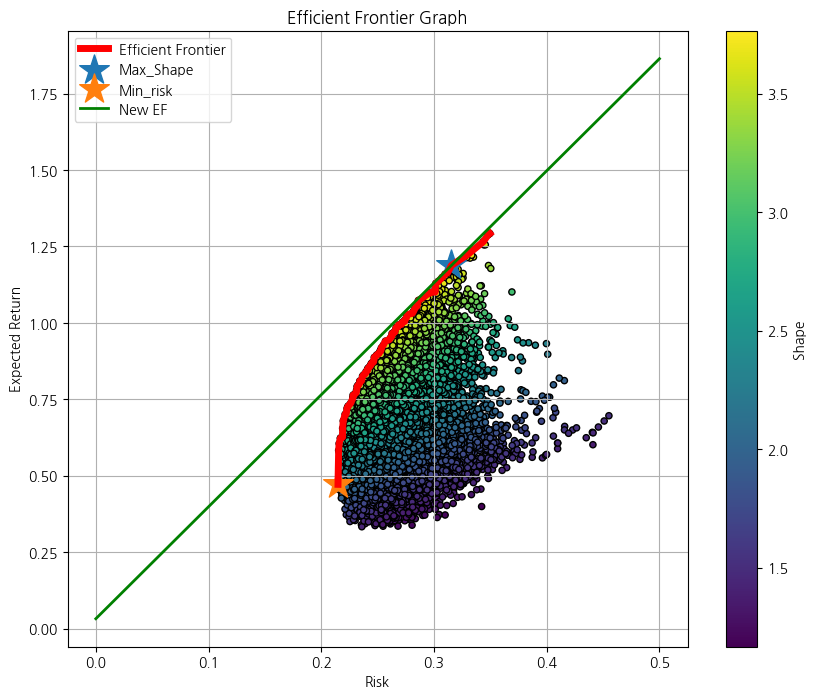

In [29]:
to_upward.show_CAPM(df,tmp2,max_shape,min_risk,rf=rf)

In [30]:
to_upward.show_portfolio(max_shape)

채권의 비중 : 0.6746075011274515
이 경우 Risk : 0.102631323021675


In [31]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
16126,"636,937.90","130,398.23","101,544.46","123,634.32","7,485.08"


In [15]:
sim_num = 1000
balance_df = to_upward.monte_sim(sim_num,tmp,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,...,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,1.047203e+06,9.879045e+05,9.949443e+05,1.010104e+06,9.975422e+05,1.005903e+06,9.957383e+05,1.017333e+06,993417.727065,9.756426e+05,...,1.013750e+06,972316.204072,1.016369e+06,1.006109e+06,1.004698e+06,9.854559e+05,1.006115e+06,1.046530e+06,1.016818e+06,9.729093e+05
2,1.061249e+06,1.007082e+06,9.793142e+05,9.924649e+05,1.003975e+06,1.011626e+06,9.948847e+05,1.017082e+06,948653.479009,1.012113e+06,...,1.025435e+06,960030.052108,1.000114e+06,9.981077e+05,1.008426e+06,9.769185e+05,1.005808e+06,1.035820e+06,1.029687e+06,1.004434e+06
3,1.037499e+06,1.030557e+06,9.746658e+05,9.687610e+05,1.004717e+06,1.022257e+06,1.003558e+06,1.012848e+06,934816.252904,9.803710e+05,...,1.024543e+06,946825.598206,1.007591e+06,1.006612e+06,1.007346e+06,9.902029e+05,1.003074e+06,1.018406e+06,1.061632e+06,9.900411e+05
4,1.032013e+06,1.033839e+06,9.536967e+05,9.747745e+05,1.002558e+06,1.015440e+06,1.014038e+06,9.956191e+05,929947.369469,9.829883e+05,...,1.007842e+06,957825.749289,1.040068e+06,1.019682e+06,1.011421e+06,1.010818e+06,1.016783e+06,1.011898e+06,1.086961e+06,9.994522e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.190922e+06,8.734620e+05,9.461080e+05,7.971497e+05,1.091345e+06,8.214595e+05,1.287341e+06,1.384687e+06,913743.301607,9.759652e+05,...,1.167019e+06,920225.171790,7.461198e+05,1.057188e+06,9.093800e+05,9.410592e+05,1.030391e+06,7.857708e+05,1.152471e+06,1.119705e+06
96,1.187064e+06,8.996562e+05,9.835137e+05,7.998228e+05,1.129009e+06,8.153755e+05,1.234897e+06,1.358343e+06,898899.916607,1.011169e+06,...,1.167366e+06,921419.504833,7.621172e+05,1.032999e+06,9.007986e+05,9.415353e+05,1.026263e+06,7.880359e+05,1.148624e+06,1.098804e+06
97,1.183195e+06,9.025789e+05,9.936749e+05,7.776027e+05,1.136516e+06,7.996951e+05,1.257030e+06,1.335282e+06,897240.546569,9.929967e+05,...,1.169155e+06,919697.720862,7.493548e+05,1.025771e+06,9.152512e+05,9.857518e+05,1.046942e+06,7.876888e+05,1.155064e+06,1.096986e+06
98,1.210499e+06,8.989275e+05,1.012269e+06,7.599687e+05,1.131576e+06,8.273616e+05,1.315356e+06,1.321816e+06,903660.390556,1.022409e+06,...,1.170500e+06,935677.294954,7.529111e+05,1.022200e+06,9.201023e+05,9.792118e+05,1.071367e+06,7.916217e+05,1.181290e+06,1.073732e+06


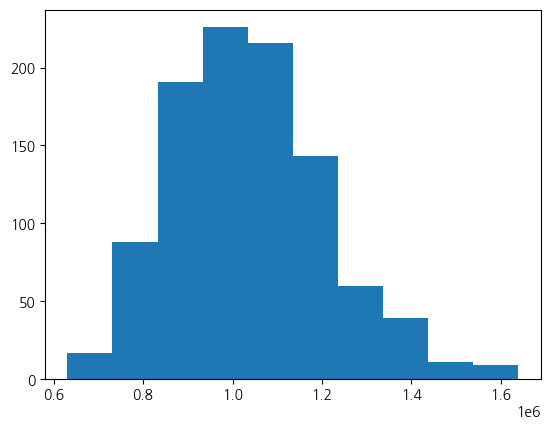

In [33]:
plt.hist(balance_df.iloc[99])
plt.show()

In [34]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') 
pd.DataFrame(balance_df.iloc[99].quantile([0.5,0.9]).to_numpy(),columns=['포트폴리오가치'],index=['50%','90%'])

,포트폴리오가치
50%,"1,020,331.76"
90%,"1,255,830.35"


In [41]:
data2 = data[["추정PER",'동종업계trailingPE','priceToBook','enterpriseValue','enterpriseToRevenue','enterpriseToEbitda','trailingEps','priceToSalesTrailing12Months','trailingPE']]

In [46]:
data2.iloc[1].to_dict()

{'추정PER': '69.4',
 '동종업계trailingPE': 9.59,
 'priceToBook': 5.44,
 'enterpriseValue': 135256086675456.0,
 'enterpriseToRevenue': 4.508,
 'enterpriseToEbitda': 34.66,
 'trailingEps': 3306,
 'priceToSalesTrailing12Months': 4.440976,
 'trailingPE': 167.27}

In [49]:
for k,v in data2.iloc[1].to_dict().items():
    print(f"{k} = {v}")
    

추정PER = 69.4
동종업계trailingPE = 9.59
priceToBook = 5.44
enterpriseValue = 135256086675456.0
enterpriseToRevenue = 4.508
enterpriseToEbitda = 34.66
trailingEps = 3306
priceToSalesTrailing12Months = 4.440976
trailingPE = 167.27


In [ ]:
# Name                                             삼성전자
# 추정PER                                            45.2
# 동종업계trailingPE                                   9.59
# priceToBook                                      1.09
# enterpriseValue                374,294,588,686,336.00
# enterpriseToRevenue                              1.38
# enterpriseToEbitda                               4.62
# trailingEps                                      8057
# priceToSalesTrailing12Months                     1.67
# trailingPE                                       8.55

# 이러한 contents가 주어졌을 때, 다음과 같은 글을 생성해야한다.
# 삼성전자는 전문가들이 추정한 추정 PER가 실제 PER보다 매우 높은 것으로 보아, 현재 저평가 상태로 추정된다.
# 또, priceToBook가 1이상으로 안정적이며, enterpriseValue는 374,294,588,686,336으로 기업의 가치 또한 매우크다.
# enterpriseToEbitda를 보았을 떄 기업의 가치 대비 4배이상의 수익을 내고 있는 것으로 보아 영업성과 또한 매우 우수하다.
# 또한, 동종업계 대비 PER가 낮은 것으로 보아 동종업계 내에서도 다소 저평가 중인 상태인 것을 알 수 있다.
# 종합적으로 보았을 때, 삼성전자는 영업성과는 뛰어나지만 저평가된 상태로 향후 주가상승을 기대할 수 있을 것으로 예상된다.

# Name                                             LG에너지솔루션
# 추정PER                                            69.4
# 동종업계trailingPE                                   9.59
# priceToBook                                      5.44
# enterpriseValue                135,256,086,675,456.00
# enterpriseToRevenue                              4.51
# enterpriseToEbitda                              34.66
# trailingEps                                      3306
# priceToSalesTrailing12Months                     4.44
# trailingPE                                     167.27
# 예시와 비슷한 글을 생성해줘.

In [109]:
tmp3 = pd.DataFrame()
for i in [0.9,0.75,0.5,0.25,0.1]:
    lst = []
    idx = balance_df.T[balance_df.iloc[-1] >= balance_df.iloc[-1].quantile(i)][99].sort_values().index[0]
    for k in range(19,100,20):
        lst.append((balance_df.T.iloc[idx].iloc[k]-balance)/balance*100)
    tmp3[f'{100-i*100}%'] = lst

tmp3.index=[f"{i}month" for i in range(1,6)]
tmp3

,10.0%,25.0%,50.0%,75.0%,90.0%
1month,-1.35,5.13,-0.26,7.93,0.42
2month,15.91,6.84,-5.88,3.56,-1.07
3month,46.58,10.83,-4.23,7.45,1.80
4month,35.53,19.49,6.01,-8.80,-9.81
5month,25.74,14.40,2.04,-8.82,-17.20


In [105]:
import plotly.express as px
px.line(tmp3)